 # **Electric Vehicle Population:**







**Name:** Zahadana Haneef Thundhakkachi

**Organization:** Entri Elevate

**Date:**



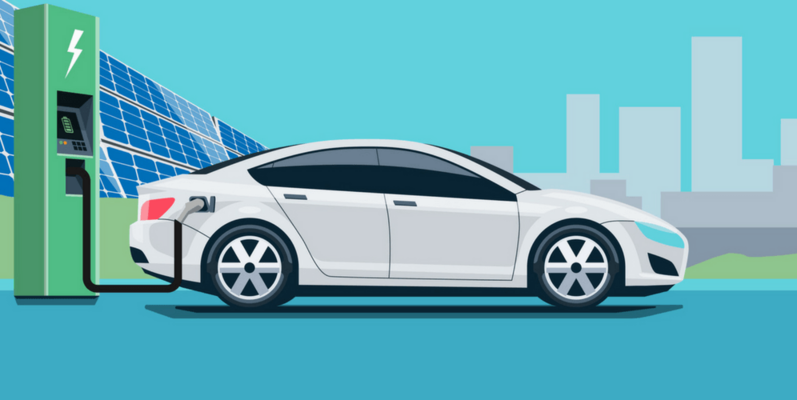

# **Overview Of This Project**:
Here is the Dataset of **'Electric_vehicle_population**':
This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).Predict whether vehicle is '**Battery Electric Vehicles or Plug-in Hybrid Electric Vehicles'**

# **Use Of This Dataset**:

This dataset is ideal for analyzing the adoption and distribution of electric vehicles across different states, with an emphasis on geographic and legislative details. It is useful for understanding trends in the electric vehicle market, evaluating pricing, and assessing the accessibility of alternative fuel vehicle incentives. The dataset can also be used for predictive modeling, helping to forecast the growth and spread of electric vehicles based on geographic, demographic, and legislative factors.

# **Objective:**
The main goal is to analyze the dataset to classify vehicles as BEV or PHEV by exploring features such as
**model year, electric range, make, model, and Electric eligibility.**





# **Dataset Link** :https://docs.google.com/spreadsheets/d/17ZSfvCs747YOO2x8ZAfgqT7U8Ut0X-BQ7-RT0HoId4o/edit?usp=sharing

#**Data Description:**
   - **Source**: Data.gov
   - **Features**:


*   **VIN (1-10)**: Unique identifier for vehicles
*   **County**:Location Details

*  **City**:Location Details

*   **State**:Location Details
* **Postal Code**:Location Details

*  **Model Year**:Manufactured year

*   **Make**:Manufacturer
*  **Model**:Model of the Vehicle


*   **Electric Vehicle Type**:Type of the Vehicle Whether Its Battery Electric Vehicles or Plug-in Hybrid Electric Vehicles


*   **Clean Alternative Fuel Vehicle (CAFV) Eligibility**:whether a vehicle qualifies for government incentives or benefits related to clean energy


*   **Electric Range**:Maximum miles the vehicle can travel on a full charge


*  **Base MSRP**:Vehicle's base price

*   **Legislative District**:Political district for registration
*   **DOL Vehicle ID**:Unique vehicle ID assigned by the Department of Licensing

*   **Vehicle Location**:Latitude and longitude coordinates
*   **Electric Utility**: Power provider for charging the vehicle

*   **2020 Census Tract**: Census area for demographic studies




























In [ ]:
# Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,f1_score,recall_score,roc_curve, auc
from sklearn.model_selection import GridSearchCV
import joblib




In [ ]:
df=pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4JJXP66P,Kitsap,Poulsbo,WA,98370.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,23.0,258127145,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
1,1G1FX6S08K,Snohomish,Lake Stevens,WA,98258.0,2019,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,44.0,4735426,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10
2,WBY1Z2C58F,King,Seattle,WA,98116.0,2015,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81.0,0.0,34.0,272697666,POINT (-122.41067 47.57894),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1V24F,Yakima,Selah,WA,98942.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,0.0,15.0,258112970,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223990,7SAYGDEE4R,Pierce,Puyallup,WA,98374.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,2.0,264662359,POINT (-122.27575 47.13959),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
223991,WBY8P2C00M,Snohomish,Lake Stevens,WA,98258.0,2021,BMW,I3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,44.0,157728168,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10
223992,JN1AZ0CP3B,Pierce,University Place,WA,98466.0,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73.0,0.0,28.0,261733433,POINT (-122.53756 47.23165),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
223993,5YJ3E1EA2R,Pierce,Puyallup,WA,98374.0,2024,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,25.0,275283487,POINT (-122.27575 47.13959),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10


In [ ]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

#**Statistical informations**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223995 entries, 0 to 223994
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         223995 non-null  object 
 1   County                                             223992 non-null  object 
 2   City                                               223992 non-null  object 
 3   State                                              223995 non-null  object 
 4   Postal Code                                        223992 non-null  float64
 5   Model Year                                         223995 non-null  int64  
 6   Make                                               223995 non-null  object 
 7   Model                                              223995 non-null  object 
 8   Electric Vehicle Type                              223995 non-null  object

In [ ]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,223992.000000,223995.000000,223977.000000,223977.000000,223521.000000,2.239950e+05,2.239920e+05
mean,98176.491165,2021.264408,47.736187,829.894386,28.876361,2.329328e+08,5.297997e+10
std,2544.240509,2.989676,84.987140,7372.509049,14.911023,6.884329e+07,1.531491e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.008002e+08,5.303301e+10
50%,98126.000000,2022.000000,0.000000,0.000000,32.000000,2.482992e+08,5.303303e+10
75%,98374.000000,2023.000000,39.000000,0.000000,42.000000,2.673973e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


#**Numerical Columns:**

*   **Postal Code**:It Has outlier
*  **Model Year**:There is NO Significant Outlier
*   **Electric Range**:It Has extreme outliers Mean value is greater than that of Median value

*  **Base MSRP**:It Has Outiler Mean value is more than Median
*   **Legislative District**:No significant Outlier

*   **2020 Census Tract**:No significant Outlier









In [ ]:
df.isnull().sum()

,0
VIN (1-10),0
County,3
City,3
State,0
Postal Code,3
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(223995, 17)

check the target column count whether its balanced or imbalanced

In [ ]:
df['Electric Vehicle Type'].value_counts().sum() # Total no of counts in Target Columns

223995

In [ ]:
df['Electric Vehicle Type'].value_counts()

,count
Electric Vehicle Type,
Battery Electric Vehicle (BEV),177151
Plug-in Hybrid Electric Vehicle (PHEV),46844


* This Classes are Imbalanced need to transform data's with the help of Resampling Techniques called **SMOTE**

#**DATA PREPROCESSING**

Handling missing values by using imputation techniques:
*  Mode

*   Removing rows/columns with missing data.
  




In [ ]:
#"Deleting unwanted columns like 'Postal Code','Legislative District','DOL Vehicle ID','2020 Census Tract','Vehicle Location','County','Electric Range','VIN (1-10)'".......

df.drop(columns=['2020 Census Tract','Vehicle Location','Base MSRP','DOL Vehicle ID','Postal Code','VIN (1-10)','County','Electric Range'], inplace=True)


In [ ]:
df

,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Legislative District,Electric Utility
0,Poulsbo,WA,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23.0,PUGET SOUND ENERGY INC
1,Lake Stevens,WA,2019,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,44.0,PUGET SOUND ENERGY INC
2,Seattle,WA,2015,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,34.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3,Seattle,WA,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,37.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
4,Selah,WA,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,15.0,PACIFICORP
...,...,...,...,...,...,...,...,...,...
223990,Puyallup,WA,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,2.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
223991,Lake Stevens,WA,2021,BMW,I3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,44.0,PUGET SOUND ENERGY INC
223992,University Place,WA,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,28.0,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
223993,Puyallup,WA,2024,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,25.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [ ]:
#"Filling null values using fillna() allows to replace missing data with a specified value, statistical measure".
df['Legislative District']=df['Legislative District'].fillna(df['Legislative District'].median())

# removing warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df.isnull().sum()

,0
City,3
State,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0
Legislative District,0
Electric Utility,3


In [ ]:
#"Removing missing values using dropna() will not have a significant effect on the dataset".

df=df.dropna(subset=['Electric Utility','City'])

In [ ]:
# rechecking null values
df.isnull().sum()

,0
City,0
State,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0
Legislative District,0
Electric Utility,0


"Now all the missing values are treated with suitable values"

In [ ]:
# Checking unique values for each columns
df['Model Year'].unique()

array([2023, 2019, 2015, 2021, 2017, 2020, 2024, 2014, 2016, 2022, 2018,
       2025, 2013, 2011, 2012, 2010, 2008, 2000, 2002, 1999, 2003])

In [ ]:
df['Make'].unique()

array(['JEEP', 'CHEVROLET', 'BMW', 'TESLA', 'NISSAN', 'LEXUS', 'KIA',
       'POLESTAR', 'HYUNDAI', 'TOYOTA', 'RIVIAN', 'VOLVO', 'FIAT',
       'MAZDA', 'AUDI', 'CHRYSLER', 'FORD', 'MERCEDES-BENZ', 'HONDA',
       'MITSUBISHI', 'VOLKSWAGEN', 'SUBARU', 'PORSCHE', 'JAGUAR', 'MINI',
       'GMC', 'LUCID', 'CADILLAC', 'SMART', 'LINCOLN', 'LAND ROVER',
       'GENESIS', 'ALFA ROMEO', 'FISKER', 'DODGE', 'ACURA',
       'MULLEN AUTOMOTIVE INC.', 'TH!NK', 'VINFAST', 'BRIGHTDROP',
       'AZURE DYNAMICS', 'ROLLS-ROYCE', 'WHEEGO ELECTRIC CARS', 'BENTLEY',
       'LAMBORGHINI', 'RAM'], dtype=object)

In [ ]:
df['Model'].unique()

array(['WRANGLER', 'BOLT EV', 'I3', 'MODEL 3', 'MODEL S', '530E',
       'MODEL X', 'LEAF', 'RZ', 'EV6', 'PS2', 'SANTA FE', 'MODEL Y',
       '330E', 'PRIUS PRIME', 'R1T', 'XC60', 'X5', '500', 'BOLT EUV',
       'CX-90', 'NIRO', 'XC90', 'R1S', 'E-TRON', 'RX', 'IX', 'PACIFICA',
       'IONIQ', 'SOUL', 'F-150', 'Q5 E', 'VOLT', 'SORENTO',
       'GRAND CHEROKEE', 'RAV4 PRIME', 'GLC-CLASS', 'A3', 'CX-70',
       'CLARITY', 'C-MAX', 'OUTLANDER', 'PRIUS PLUG-IN', 'Q5', 'NX',
       'SPORTAGE', 'ID.4', 'SOLTERRA', 'ARIYA', 'E-GOLF', 'FUSION',
       'IONIQ 5', 'SPARK', 'MUSTANG MACH-E', 'CAYENNE', 'TRANSIT', 'BZ4X',
       'EQS-CLASS SEDAN', '745E', 'KONA ELECTRIC', 'I-PACE', 'Q4', 'EV9',
       'TAYCAN', 'V60', 'SQ8', 'EQS-CLASS SUV', 'I4', 'XC40', 'EQB-CLASS',
       'TUCSON', 'EQUINOX EV', 'PROLOGUE', 'I5', 'HARDTOP',
       'HUMMER EV PICKUP', 'AIR', 'FOCUS', 'BLAZER EV', 'LYRIQ', 'I-MIEV',
       'Q8', 'FORTWO ELECTRIC DRIVE', 'AVIATOR', 'S90', 'ESCAPE',
       'E-TRON GT', 'KONA', 'IONI

#**Filtering numerical columns**



In [ ]:
numerical_cols=df.select_dtypes('number')
numerical_cols

,Model Year,Legislative District
0,2023,23.0
1,2019,44.0
2,2015,34.0
3,2019,37.0
4,2015,15.0
...,...,...
223990,2024,2.0
223991,2021,44.0
223992,2011,28.0
223993,2024,25.0


#**Outlier Detection**: Using Boxplot

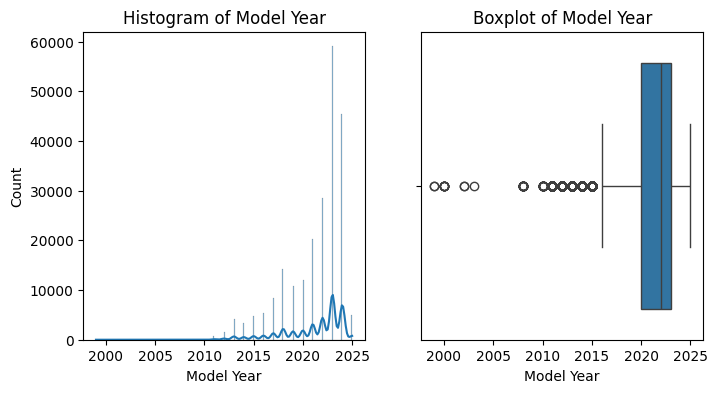

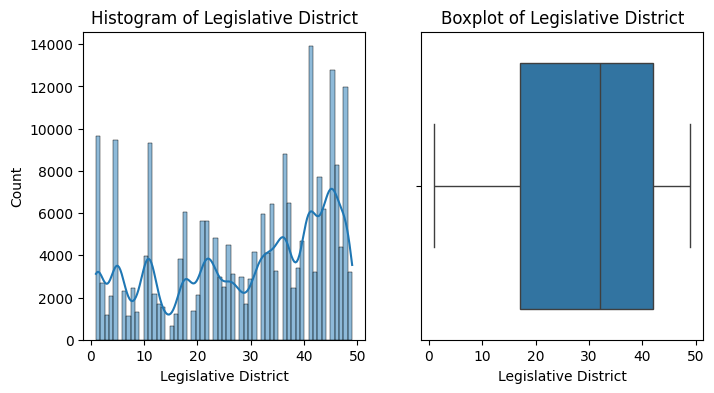

In [ ]:
#checking for outliers using boxplot of numerical columns
for column in numerical_cols:
    plt.figure(figsize=(8, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

* This boxplot indicating the presence of outlier in numerical columns

In [ ]:
#Applying IQR method for handling outlier:
#every columns have outliers so its better to remove the  outliers
# Handling using for loop

for col in ['Model Year', 'Legislative District']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"{col}: Outliers are below {lower_bound} and above {upper_bound}")

    # Filter data based on the calculated bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Round the filtered columns to whole numbers
df['Model Year'] = df['Model Year'].round(0).astype(int)
df['Legislative District'] = df['Legislative District'].round(0).astype(int)




Model Year: Outliers are below 2015.5 and above 2027.5
Legislative District: Outliers are below -20.5 and above 79.5


In [ ]:
#Checking skewness of numerical columns
numerical_cols.skew()

,0
Model Year,-1.265119
Legislative District,-0.430404


In [ ]:
# Convert a specific column to integer
df['Model Year'] = df['Model Year'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209387 entries, 0 to 223994
Data columns (total 9 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   City                                               209387 non-null  object
 1   State                                              209387 non-null  object
 2   Model Year                                         209387 non-null  int64 
 3   Make                                               209387 non-null  object
 4   Model                                              209387 non-null  object
 5   Electric Vehicle Type                              209387 non-null  object
 6   Clean Alternative Fuel Vehicle (CAFV) Eligibility  209387 non-null  object
 7   Legislative District                               209387 non-null  int64 
 8   Electric Utility                                   209387 non-null  object
dtypes: int64(2

#**Visualising  skewness using Histogram**


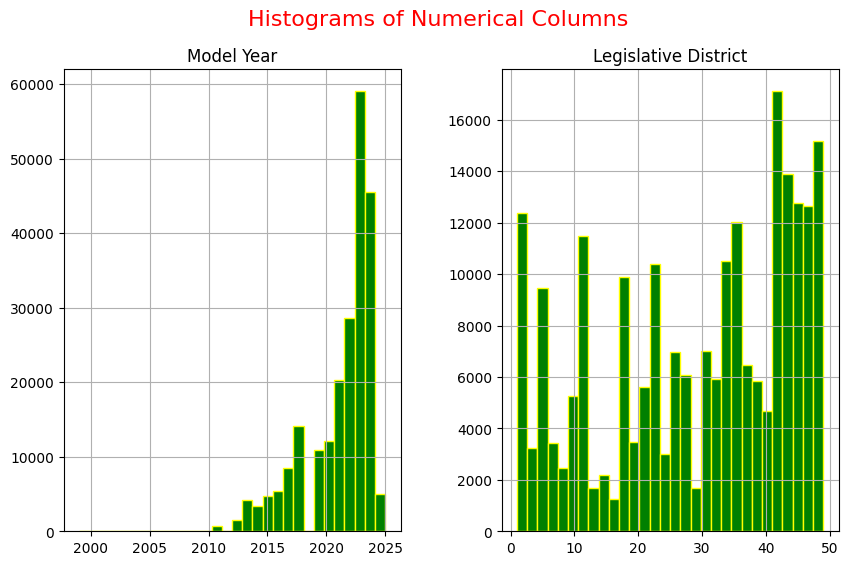

In [ ]:
# Plot histograms for all numerical columns
numerical_cols.hist(figsize=(10,6),bins=30,edgecolor='yellow',color='green')
plt.suptitle('Histograms of Numerical Columns',color='red',fontsize=16)
plt.show()


* **Model Year**:skewness value is -1 it indicates that it is negatively,skewed and distribution is on left side.

*  **Legislative District**:skewness value is -0.4 it indicates 	that it has small  skewness may be on right or left distribution.


In [ ]:
#The Electric Range column has a small skewness, so it is treated using the square root transformation method.
numerical_cols['Legislative District']=numerical_cols['Legislative District'].apply(lambda x:np.sqrt(x))

#**Histograms of Numerical Columns After Skewness Treatment**

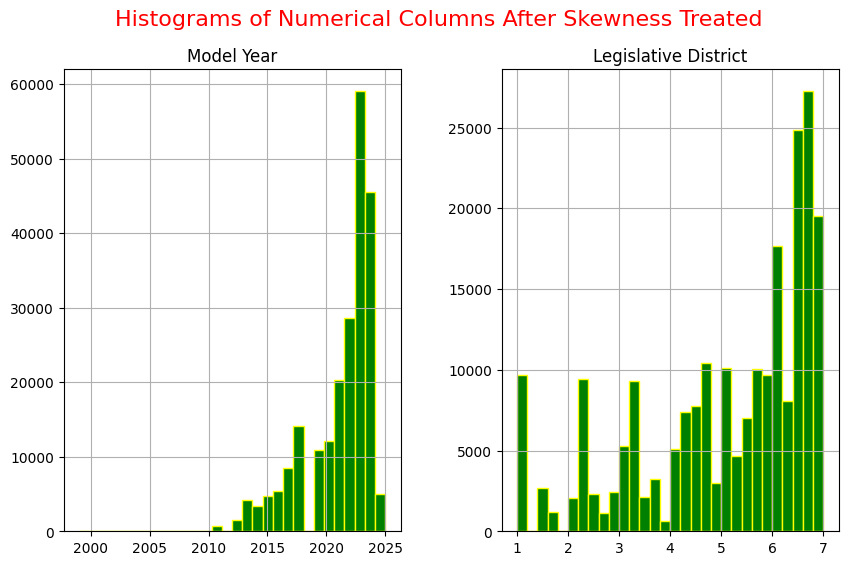

In [ ]:
numerical_cols.hist(figsize=(10,6),bins=30,edgecolor='yellow',color='green')
plt.suptitle('Histograms of Numerical Columns After Skewness Treated',color='red',fontsize=16)
plt.show()

#**Exploratory Data Analysis**

selecting categorical Columns and for Numerical columns for visualisation

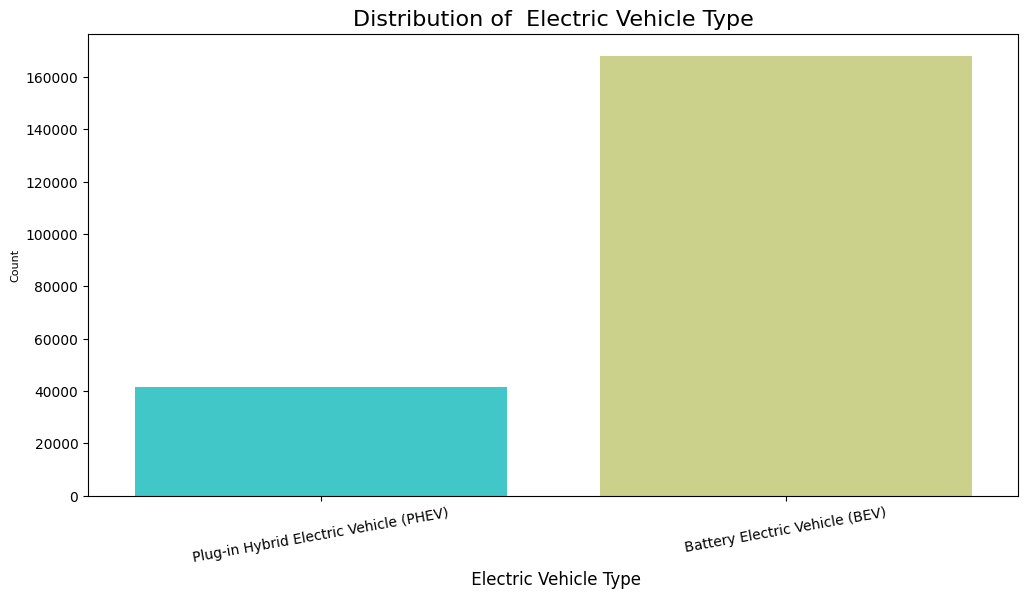

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Electric Vehicle Type', data=df, palette='rainbow')
plt.title('Distribution of  Electric Vehicle Type', fontsize=16)
plt.xlabel(' Electric Vehicle Type', fontsize=12)
plt.ylabel('Count', fontsize=8)
plt.xticks(rotation=10)
plt.show()

* Here BEV count is more than PHEV that means most of them are using BEV Electric Vehicle Type

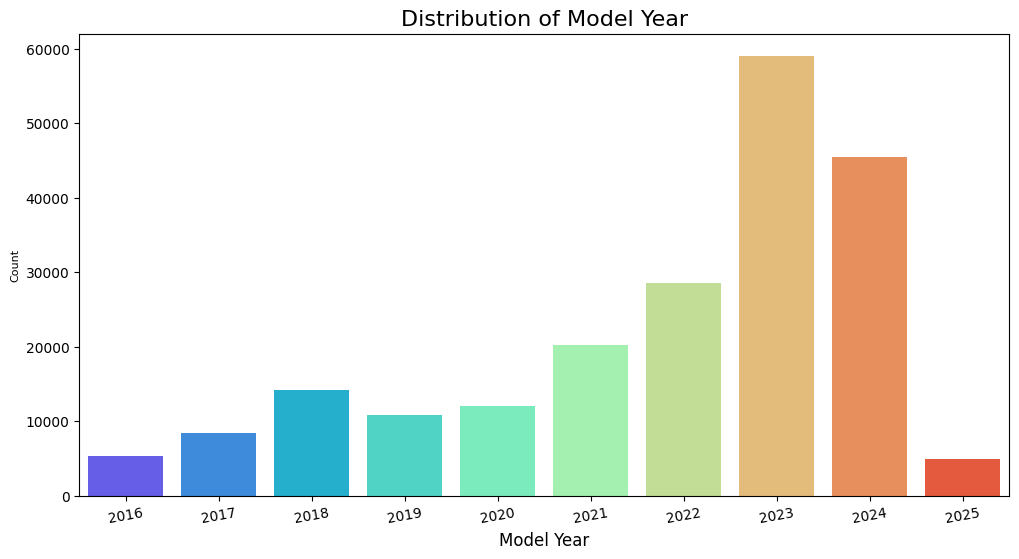

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Model Year', data=df, palette='rainbow')
plt.title('Distribution of Model Year', fontsize=16)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Count', fontsize=8)
plt.xticks(rotation=10)
plt.show()

* This shows the distribution of electric vehicle over the model years.
in the year 2023 - 2024 there is a rapid increasing the production of newer models.count for 2025 is less when compaired to others.

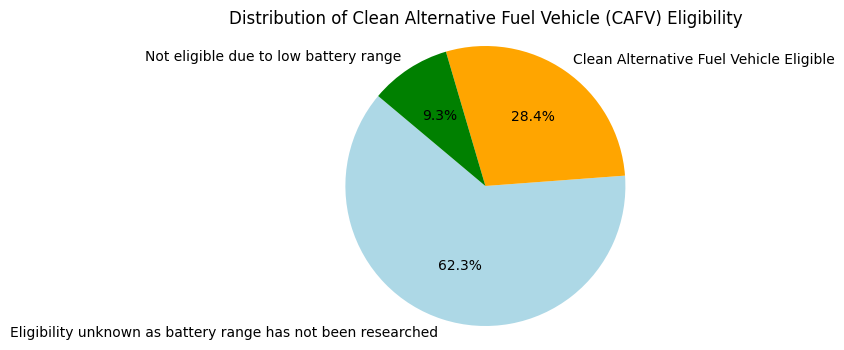

In [ ]:
cafv_counts = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 4))
plt.pie(cafv_counts, labels=cafv_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'orange', 'green'])
plt.title('Distribution of Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.axis('equal')
plt.show()



*   62.3% of vehicles have an unknown eligibility status due to unresearched battery range.
* 28.4% of vehicles are eligible for CAFV.
* 9.3% of vehicles are not eligible due to a low battery range.


 A large number of vehicles don’t have enough data on their battery range. This could make it harder to create good policies and incentives for electric vehicles.

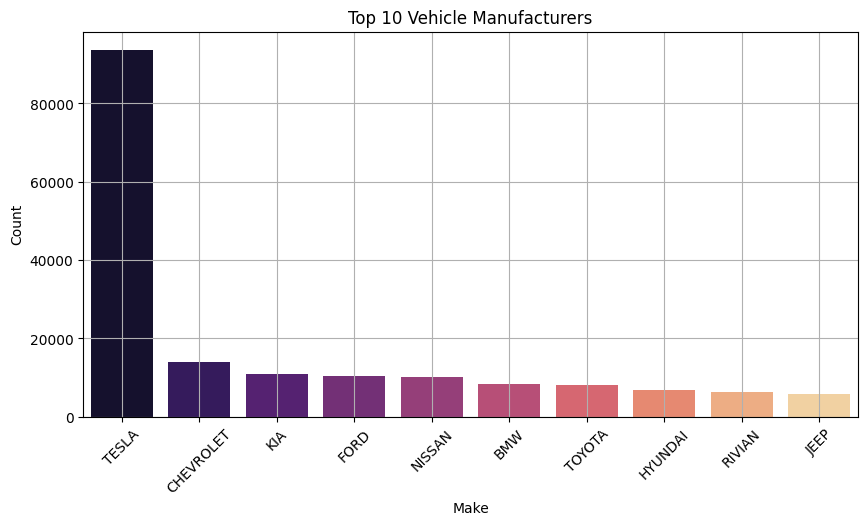

In [ ]:
top_makes = df['Make'].value_counts().nlargest(10)  # Top 10 manufacturers

plt.figure(figsize=(10, 5))
sns.barplot(x=top_makes.index, y=top_makes.values, palette='magma')
plt.title('Top 10 Vehicle Manufacturers')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


 * Telsa is the leading manufacturer of electric vehicles in the dataset, contributing the highest proportion among all vehicle makers. This reflects Tesla's strong market presence and popularity in the EV industry.

In [ ]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Not eligible due to low battery range',
       'Clean Alternative Fuel Vehicle Eligible',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

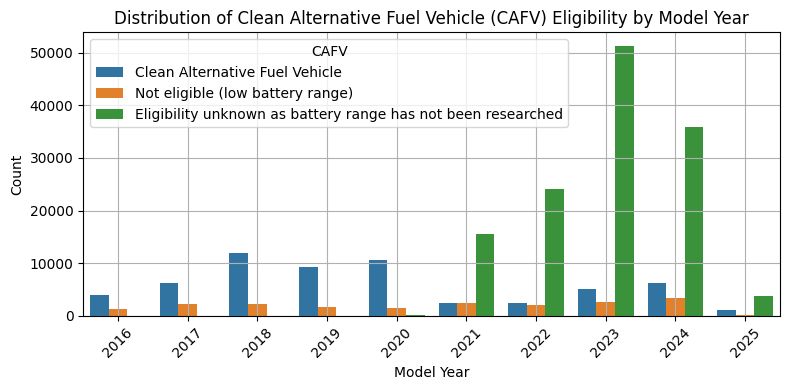

In [ ]:
plt.figure(figsize=(8, 4))

# Create the clustered bar plot
sns.countplot(data=df, x='Model Year', hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility')

# Set the title and labels
plt.title('Distribution of Clean Alternative Fuel Vehicle (CAFV) Eligibility by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Update the legend labels
plt.legend(title='CAFV', labels=['Clean Alternative Fuel Vehicle', 'Not eligible (low battery range)','Eligibility unknown as battery range has not been researched'])

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

* The no of CAFVs has increasing over the years
* There is a noticeble rise from 2016-2024
* in recent years especially from 2021-2025 there is a rise in **Eligibility Unknown** this peak suggest that many new vehicles have not been evaluated for battery range eligibility
* 2023-2024 the highest count of vehicles are registered.however most of the vehicles are fall under the unkwon category.
*

In [ ]:
df_recent = df[df['Model Year'].isin([2023, 2024])] # checks if each value in the 'Model Year' 2023 or 2024.

eligibility_counts = df_recent['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
print(eligibility_counts)

unknown_percentage = (eligibility_counts['Eligibility unknown as battery range has not been researched'] /
                      eligibility_counts.sum()) * 100
print(f"Unknown eligibility vehicles: {unknown_percentage:.2f}%")



Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    87118
Clean Alternative Fuel Vehicle Eligible                         11394
Not eligible due to low battery range                            6073
Name: count, dtype: int64
Unknown eligibility vehicles: 83.30%


Clean Alternative Fuel Vehicle (CAFV) Eligibility  Clean Alternative Fuel Vehicle Eligible  \
Model Year                                                                                   
2016                                                                                4039.0   
2017                                                                                6197.0   
2018                                                                               11860.0   
2019                                                                                9271.0   
2020                                                                               10591.0   
2021                                                                                2375.0   
2022                                                                                2529.0   
2023                                                                                5094.0   
2024                                                        

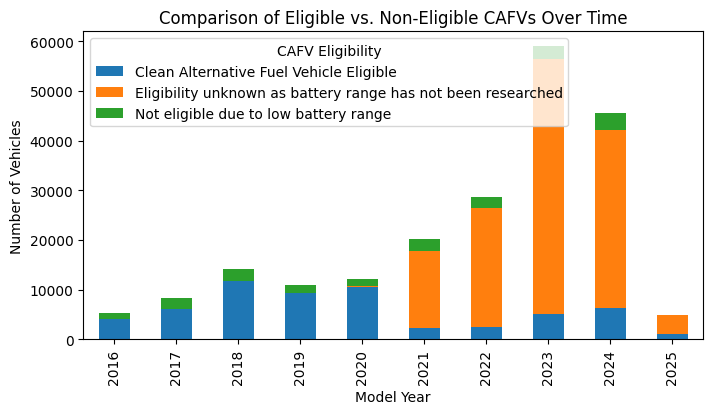

In [ ]:
yearly_counts = df.groupby(['Model Year', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']).size().unstack()
print(yearly_counts)

yearly_counts.plot(kind='bar', stacked=True, figsize=(8, 4))
plt.title("Comparison of Eligible vs. Non-Eligible CAFVs Over Time")
plt.ylabel("Number of Vehicles")
plt.xlabel("Model Year")
plt.legend(title="CAFV Eligibility")
plt.show()


 *  eligibility unknown vehicles increased suddenly, this might indicate new models lacking  incomplete research on battery ranges for some vehicles, emphasizing the need for better data collection.

 * If CAFV growth aligns with government incentives, policies likely influenced adoption



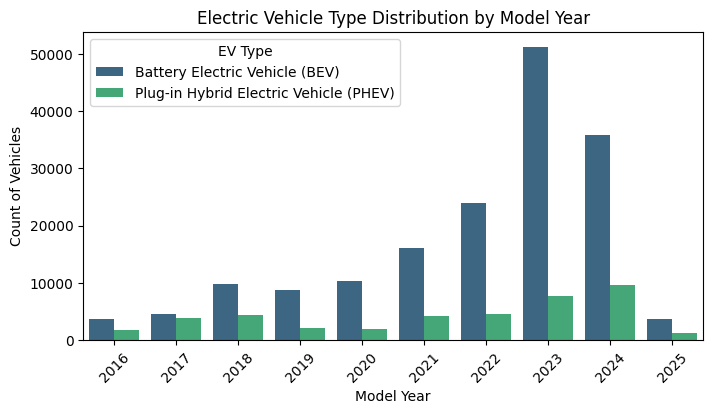

In [ ]:
plt.figure(figsize=(8, 4))

# Create a count plot
sns.countplot(data=df, x="Model Year", hue="Electric Vehicle Type", palette="viridis")

# Customize labels and title
plt.xlabel("Model Year")
plt.ylabel("Count of Vehicles")
plt.title("Electric Vehicle Type Distribution by Model Year")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="EV Type")

* **Increase in BEV Adoption**: BEVs saw a sharp rise in 2023, indicating growing popularity.

* **Slow PHEV Adoption** : PHEVs (Plug-in Hybrid Electric Vehicles) saw a smaller, steadier rise compared to BEVs.

* **Lower Counts in Early Years**:  EV adoption was slow from 2016 to 2020, likely due to high costs and limited infrastructure.

* **Recent Decline (2024-2025)** : A drop in numbers, possibly due to data availability or changing market trends.


In [ ]:
# check the correlation
corr = numerical_cols.corr()
corr

,Model Year,Legislative District
Model Year,1.00000,-0.02028
Legislative District,-0.02028,1.00000


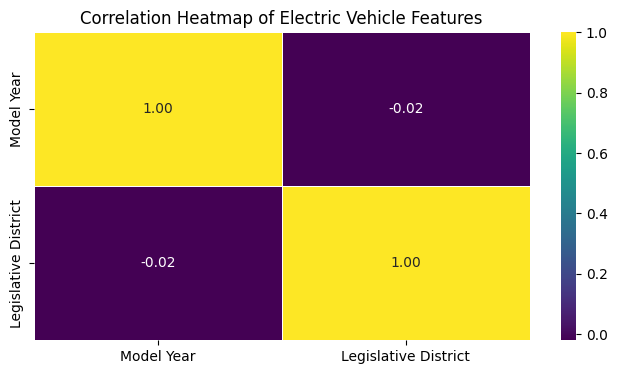

In [ ]:
# Correlation Heatmap of Electric Vehicle Features
plt.figure(figsize=(8, 4))
sns.heatmap(corr, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Electric Vehicle Features")
plt.show()


* This Heat Map Represents the relationship between two variables:

* -0.02 is relationship between **model** year and **legislative district** The model year of an EV does not strongly relate to the legislative district.


#**Feature Engineering:**

In [ ]:
# check the count of target value if it is imbalance or not
df['Electric Vehicle Type'].value_counts()

,count
Electric Vehicle Type,
Battery Electric Vehicle (BEV),168019
Plug-in Hybrid Electric Vehicle (PHEV),41368


* The dataset has imbalanced classes


select categorical columns:

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)


Index(['City', 'State', 'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
       'Electric Utility'],
      dtype='object')


* Encoding Categorical Nominal columns using OneHot Encoding Method

In [ ]:
# deleting unwanted column in dataset
df.drop('City',axis=1,inplace=True)

In [ ]:
df = pd.get_dummies(df, columns=[ 'State','Make','Model','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Utility'], drop_first=True, dtype=int)
df

,Model Year,Electric Vehicle Type,Legislative District,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,...,Electric Utility_PORTLAND GENERAL ELECTRIC CO,Electric Utility_PUD NO 1 OF CHELAN COUNTY,Electric Utility_PUD NO 1 OF DOUGLAS COUNTY,Electric Utility_PUD NO 1 OF OKANOGAN COUNTY,Electric Utility_PUD NO 1 OF PEND OREILLE COUNTY,Electric Utility_PUD NO 1 OF WHATCOM COUNTY,Electric Utility_PUD NO 2 OF GRANT COUNTY,Electric Utility_PUGET SOUND ENERGY INC,Electric Utility_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Electric Utility_PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY
0,2023,Plug-in Hybrid Electric Vehicle (PHEV),23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2019,Battery Electric Vehicle (BEV),44,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2019,Battery Electric Vehicle (BEV),37,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2021,Plug-in Hybrid Electric Vehicle (PHEV),26,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,2019,Plug-in Hybrid Electric Vehicle (PHEV),22,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223989,2023,Battery Electric Vehicle (BEV),31,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
223990,2024,Battery Electric Vehicle (BEV),2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
223991,2021,Battery Electric Vehicle (BEV),44,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
223993,2024,Battery Electric Vehicle (BEV),25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


**Random undersampling** is a technique used to balance an imbalanced dataset by randomly removing samples from the majority class. This helps prevent the model from being biased toward the majority class but may lead to loss of important information.

In [ ]:
from collections import Counter

X = df.drop('Electric Vehicle Type', axis=1)  # Features excluding the target
y = df['Electric Vehicle Type']

# Apply undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Convert back to DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['Electric Vehicle Type'])

# Combine X and y back into a single DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Check new class distribution
print(df_resampled['Electric Vehicle Type'].value_counts())


Electric Vehicle Type
Battery Electric Vehicle (BEV)            41368
Plug-in Hybrid Electric Vehicle (PHEV)    41368
Name: count, dtype: int64


* Now the classes are equally balanced

#**Feature Selection**

In [ ]:
X = df_resampled.drop('Electric Vehicle Type', axis=1)  # Features excluding the target
y = df_resampled['Electric Vehicle Type']  # Target column
# Create a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                                               Feature  Importance
239  Clean Alternative Fuel Vehicle (CAFV) Eligibil...    0.289112
83                                          Make_TESLA    0.145562
240  Clean Alternative Fuel Vehicle (CAFV) Eligibil...    0.095429
0                                           Model Year    0.041710
177                                      Model_MODEL Y    0.037123
..                                                 ...         ...
281  Electric Utility_BONNEVILLE POWER ADMINISTRATI...    0.000000
13                                            State_ID    0.000000
196                                           Model_Q6    0.000000
191                               Model_PROMASTER 3500    0.000000
33                                            State_OH    0.000000

[316 rows x 2 columns]


In [ ]:
# Set threshold value
threshold = 0.03

# Select features with importance above the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]

print("Selected Features:")
print(selected_features)

# If you want to use the selected features for your dataset X
X_selected = X[selected_features['Feature']]

Selected Features:
                                               Feature  Importance
239  Clean Alternative Fuel Vehicle (CAFV) Eligibil...    0.289112
83                                          Make_TESLA    0.145562
240  Clean Alternative Fuel Vehicle (CAFV) Eligibil...    0.095429
0                                           Model Year    0.041710
177                                      Model_MODEL Y    0.037123


In [ ]:
# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1])

 * LabelEncoder converts categorical labels in y into numerical values (e.g., 'BEV' → 0, 'PHEV' → 1)

#**Split Data into Training and Testing Sets:**

 * Splitting refers to dividing a dataset into different subsets, typically:

1.   Training Set : Used to train the model (learn patterns).

2.   Testing Set : Used to evaluate the model’s performance on unseen data



why this important:


*   Prevents Overfitting  
*    Evaluates Model Performance

*  Simulates Real-World Use







In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(66188, 5)

In [ ]:
X_test.shape

(16548, 5)

In [ ]:
y_train.shape

(66188,)

In [ ]:
y_test.shape

(16548,)

# **Feature Scaling**:


  * Technique used to standardize or normalize the range of independent variables (features) in a dataset.

In [ ]:
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.fit_transform(X_test)

# **Build ML Model and Evaluation**:

#**1 .    Logistic Regression:**


 * Logistic Regression is perfect for binary classification problems like predicting whether a vehicle is BEV (Battery Electric Vehicle) or PHEV (Plug-in Hybrid Electric Vehicle).

con, annot=True,


In [ ]:
# Initialize and train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

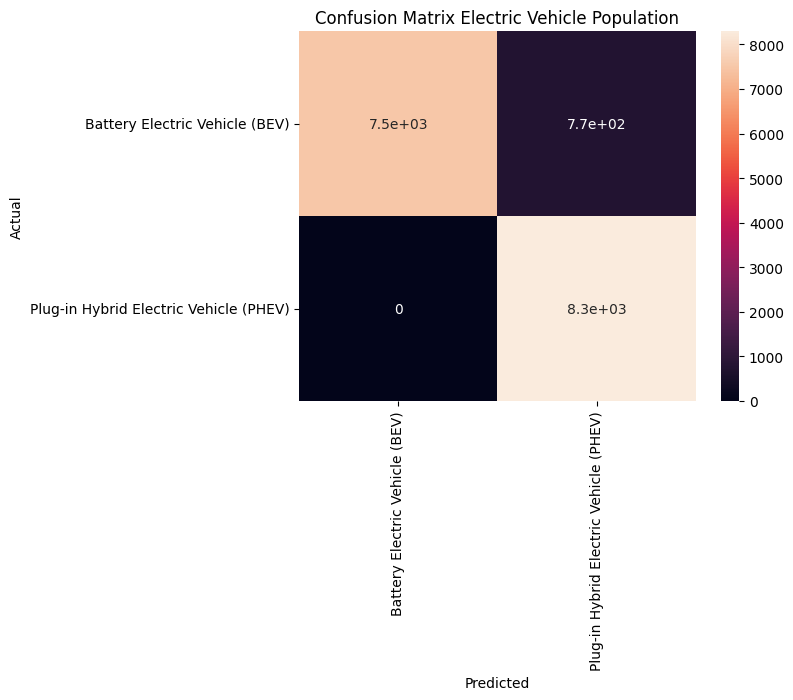

In [ ]:
# Make predictions
y_pred = logreg.predict(X_test)

con=confusion_matrix(y_test, y_pred)
sns.heatmap(con, annot=True, xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Electric Vehicle Population')
plt.show()

In [ ]:
# Classification report
CR = classification_report(y_test, y_pred)
print("Classification Report:")
print(CR)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      8255
           1       0.91      1.00      0.96      8293

    accuracy                           0.95     16548
   macro avg       0.96      0.95      0.95     16548
weighted avg       0.96      0.95      0.95     16548



In [ ]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:")
print(accuracy)

Accuracy Score:
0.9534082668600435


#**2 .    DecisionTree:**

 * Decision Trees are widely used in EV-related machine learning tasks due to their interpretability and simplicity. They can help with predicting EV adoption, classifying EV types, and analyzing charging behavior.




In [ ]:
# Initialize and train the model
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

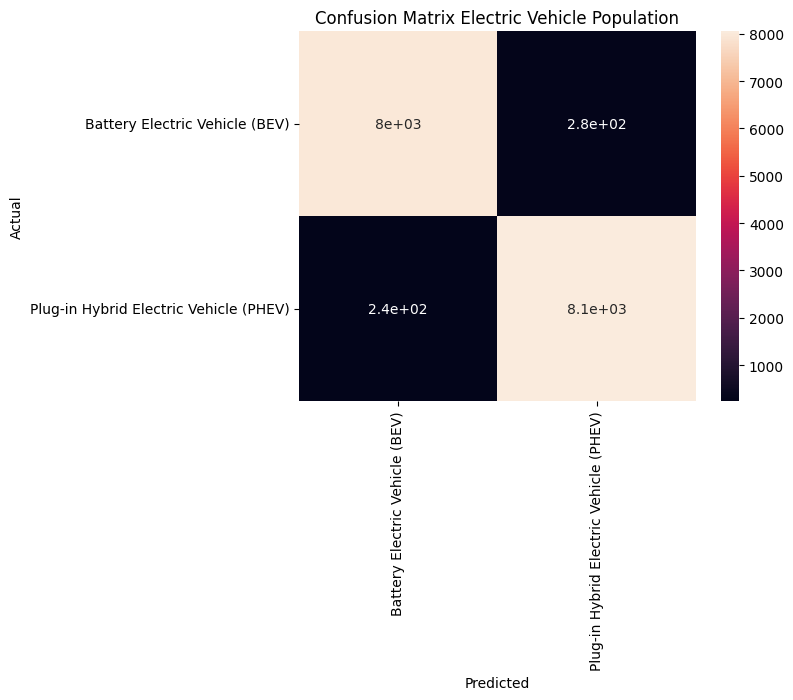

In [ ]:
# Make predictions
DT_y_pred = DT.predict(X_test)

con=confusion_matrix(y_test, DT_y_pred)
sns.heatmap(con, annot=True, xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Electric Vehicle Population')
plt.show()

In [ ]:
# Classification report
CRDT = classification_report(y_test, DT_y_pred)
print("Classification Report:")
print(CRDT)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8255
           1       0.97      0.97      0.97      8293

    accuracy                           0.97     16548
   macro avg       0.97      0.97      0.97     16548
weighted avg       0.97      0.97      0.97     16548



In [ ]:
# Accuracy score
accuracy = accuracy_score(y_test, DT_y_pred)
print("Accuracy Score:")
print(accuracy)

Accuracy Score:
0.9682741116751269


#**3 .    RandomForest:**



*   Random Forest is a powerful ensemble learning algorithm that improves upon Decision Trees by reducing overfitting and increasing accuracy. It is widely used in EV-related machine learning tasks like classification, prediction, and anomaly detection.




In [ ]:
# Initialize and train the model
rndmfrst = RandomForestClassifier()
rndmfrst.fit(X_train, y_train)

RandomForestClassifier()

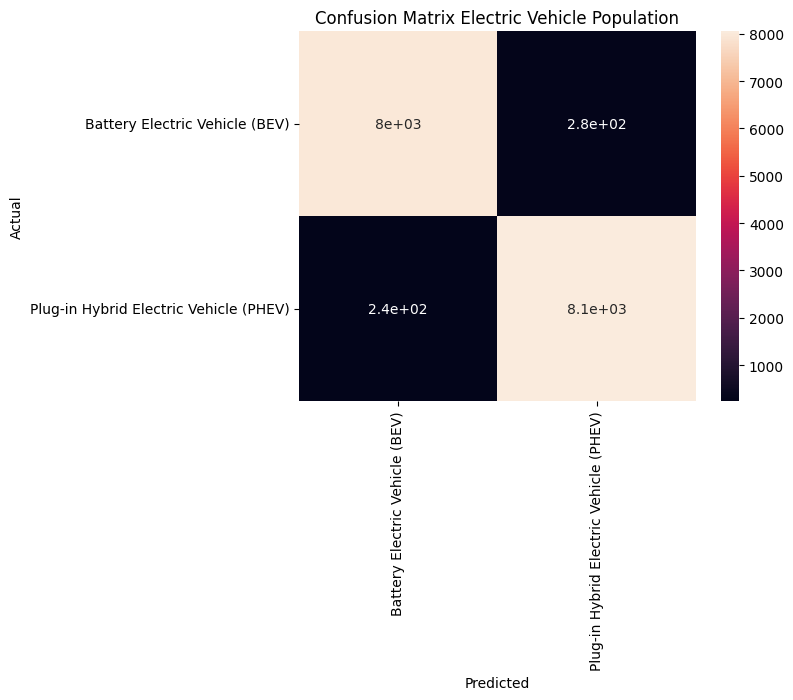

In [ ]:
# Make predictions
RF_pred = rndmfrst.predict(X_test)

con=confusion_matrix(y_test, RF_pred)
sns.heatmap(con, annot=True, xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Electric Vehicle Population')
plt.show()

In [ ]:
# Classification report
CRRF = classification_report(y_test,RF_pred )
print("Classification Report:")
print(CRRF)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8255
           1       0.97      0.97      0.97      8293

    accuracy                           0.97     16548
   macro avg       0.97      0.97      0.97     16548
weighted avg       0.97      0.97      0.97     16548



In [ ]:
# Accuracy score
accuracy = accuracy_score(y_test, RF_pred)
print("Accuracy Score:")
print(accuracy)

Accuracy Score:
0.9682741116751269


#**4 .    SupportVectorClassifier:**

 * The Support Vector Classifier (SVC) is a supervised machine learning algorithm used for classification tasks. It works by finding the optimal hyperplane that separates different classes (in this case, Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicles (PHEV))

In [ ]:
# Initialize and train the model
SVTR = SVC(kernel='linear', C=1.0)
SVTR.fit(X_train,y_train)

SVC(kernel='linear')

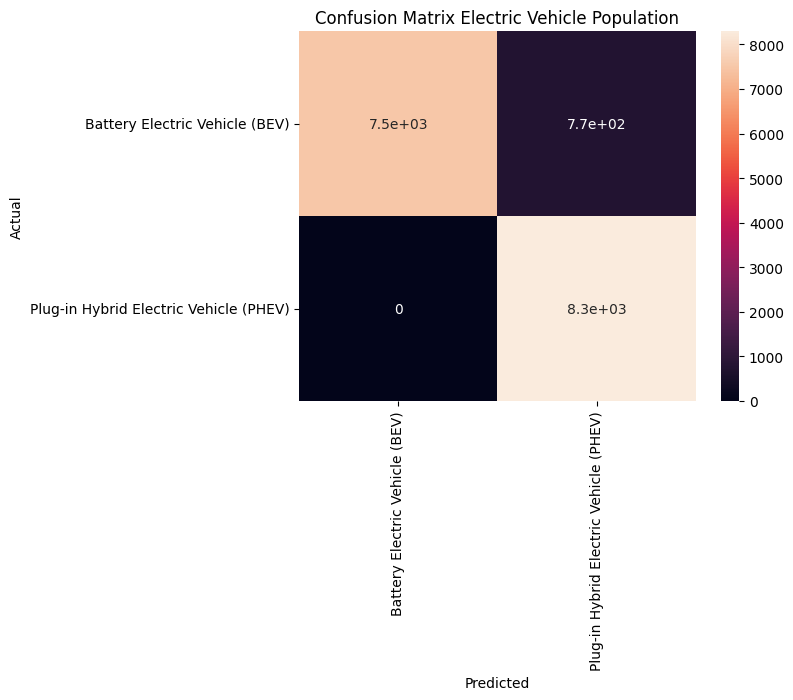

In [ ]:
# Make predictions
SVTR_pred = SVTR.predict(X_test)

con=confusion_matrix(y_test, SVTR_pred)
sns.heatmap(con, annot=True, xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Electric Vehicle Population')
plt.show()

In [ ]:
# Classification report
CRSVTR = classification_report(y_test, SVTR_pred )
print("Classification Report:")
print(CRSVTR)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      8255
           1       0.91      1.00      0.96      8293

    accuracy                           0.95     16548
   macro avg       0.96      0.95      0.95     16548
weighted avg       0.96      0.95      0.95     16548



In [ ]:
# Accuracy score
accuracy = accuracy_score(y_test,SVTR_pred )
print("Accuracy Score:")
print(accuracy)

Accuracy Score:
0.9534082668600435


#**5 .    GradientBoostingClassifier:**

Gradient Boosting is an ensemble learning method that builds multiple weak decision trees sequentially, improving errors at each step. It is great for handling complex datasets like Electric Vehicle Population, where we classify whether a vehicle is Battery Electric Vehicle (BEV) or Plug-in Hybrid Electric Vehicle (PHEV).


In [ ]:
# Initialize and train the model
GDBC = GradientBoostingClassifier()
GDBC.fit(X_train,y_train)

GradientBoostingClassifier()

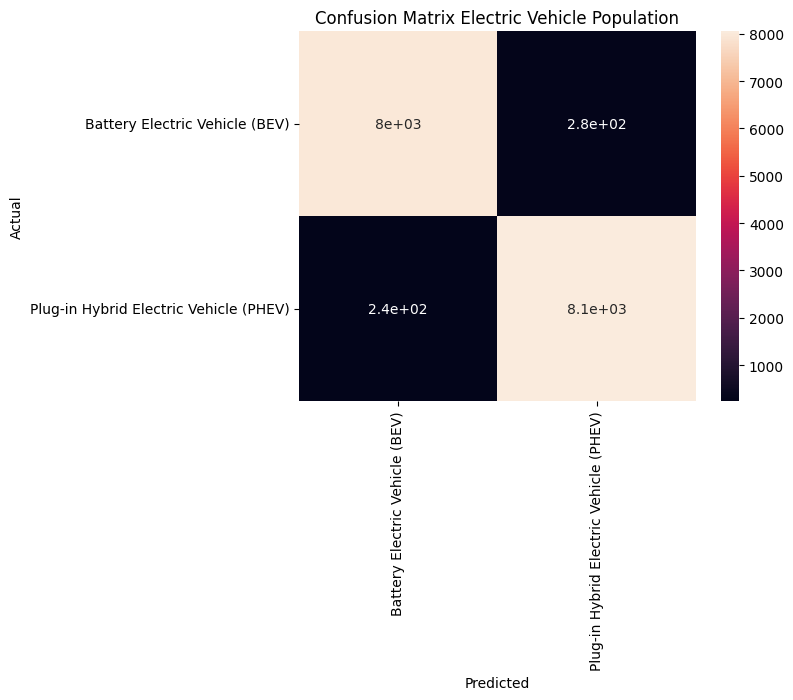

In [ ]:
# Make predictions
GDBC_pred= GDBC.predict(X_test)

con=confusion_matrix(y_test, GDBC_pred)
sns.heatmap(con, annot=True, xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Electric Vehicle Population')
plt.show()

In [ ]:
# Classification report
CRGDBC = classification_report(y_test, GDBC_pred )
print("Classification Report:")
print(CRGDBC)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8255
           1       0.97      0.97      0.97      8293

    accuracy                           0.97     16548
   macro avg       0.97      0.97      0.97     16548
weighted avg       0.97      0.97      0.97     16548



In [ ]:
# Accuracy score
accuracy = accuracy_score(y_test,GDBC_pred )
print("Accuracy Score:")
print(accuracy)

Accuracy Score:
0.9682741116751269


#**6 .    KNeighborsClassifier:**



K-Nearest Neighbors (KNN) is a simple yet powerful classification algorithm that predicts the class of a data point based on the majority vote of its nearest neighbors.

In [ ]:
# Initialize and train the model
KNNCL =  KNeighborsClassifier()
KNNCL.fit(X_train, y_train)

KNeighborsClassifier()

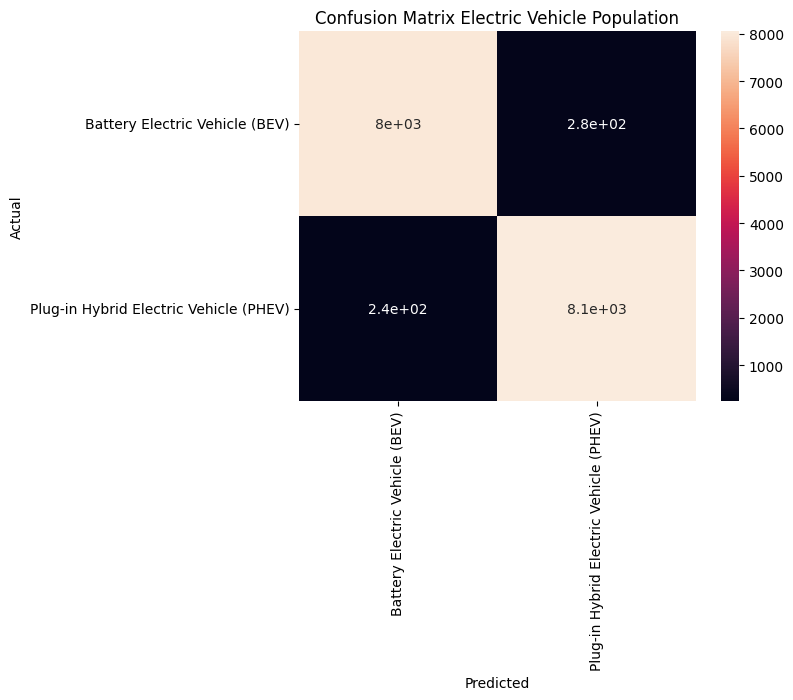

In [ ]:
# Make predictions
KNNCL_pred = KNNCL.predict(X_test)

con=confusion_matrix(y_test, KNNCL_pred)
sns.heatmap(con, annot=True, xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Electric Vehicle Population')
plt.show()

In [ ]:
# Classification report
CRKNNCL= classification_report(y_test, KNNCL_pred )
print("Classification Report:")
print(CRKNNCL)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8255
           1       0.97      0.97      0.97      8293

    accuracy                           0.97     16548
   macro avg       0.97      0.97      0.97     16548
weighted avg       0.97      0.97      0.97     16548



In [ ]:
# Accuracy score
accuracy = accuracy_score(y_test,KNNCL_pred )
print("Accuracy Score:")
print(accuracy)

Accuracy Score:
0.9682741116751269


In [ ]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Classifier' : SVC(kernel='linear', C=1.0, probability=True),
    'Decision Tree Classifier' : DecisionTreeClassifier(),
    'Random Forest Classifier' : RandomForestClassifier(),
    'Gradient Boosting Classifier' : GradientBoostingClassifier(),
    'K-Nearest Neighbors' : KNeighborsClassifier()
}


# Store accuracies
train_accuracies = []
test_accuracies = []

# Training models
for model_name, model in models.items():

  # fit the model on training data
  model.fit(X_train_scaled,y_train)
  train_accuracy = model.score(X_train_scaled, y_train)
  train_accuracies.append(train_accuracy)


In [ ]:
for model_name, model in models.items():
  # predict on test data
  y_pred = model.predict(X_test_scaled)
  test_accuracy = model.score(X_test_scaled, y_test)
  test_accuracies.append(test_accuracy)


In [ ]:
# Create a DataFrame for visualization
accuracy_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Training Accuracy': train_accuracies,
    'Testing Accuracy': test_accuracies
})


In [ ]:
print(accuracy_df)

                          Model  Training Accuracy  Testing Accuracy
0           Logistic Regression           0.956563          0.955161
1     Support Vector Classifier           0.954418          0.953408
2      Decision Tree Classifier           0.967789          0.968274
3      Random Forest Classifier           0.967789          0.968274
4  Gradient Boosting Classifier           0.967789          0.968274
5           K-Nearest Neighbors           0.965643          0.941141


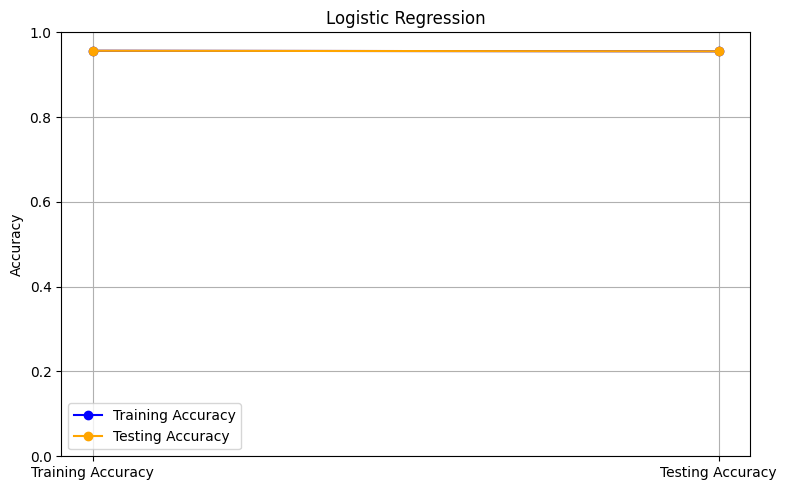

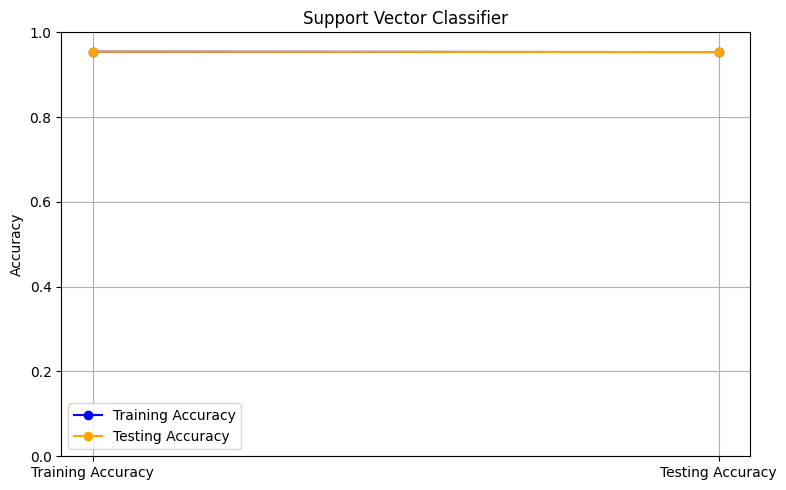

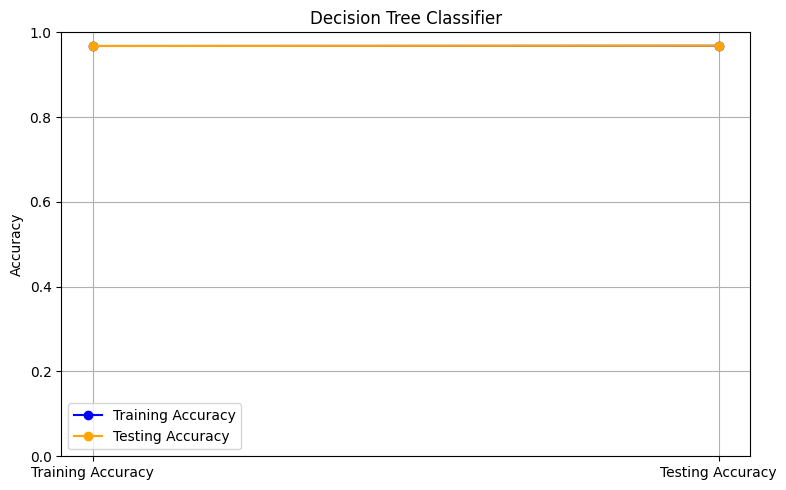

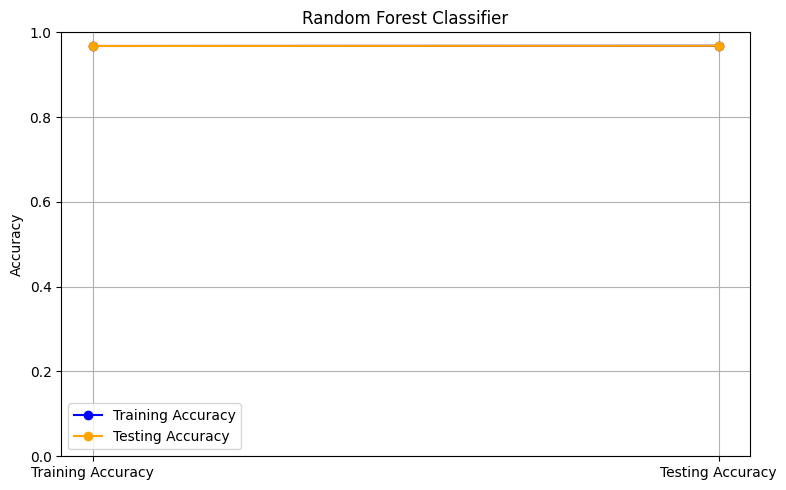

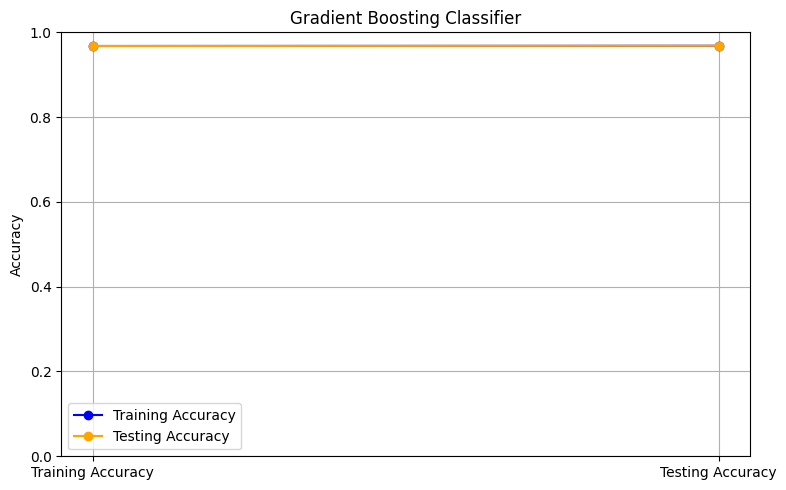

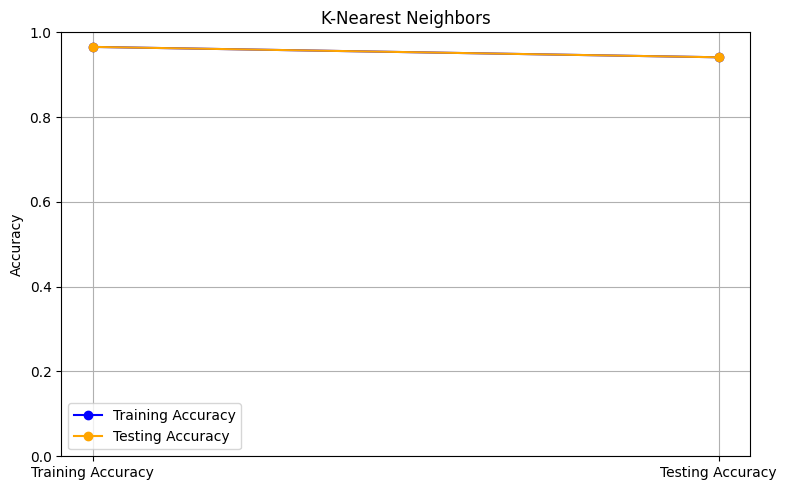

In [ ]:
# Create individual plots for each model's training and testing accuracy
for i, model_name in enumerate(models.keys()):
    plt.figure(figsize=(8, 5))

    # Plotting training accuracy in blue and testing accuracy in orange
    plt.plot(['Training Accuracy', 'Testing Accuracy'],
             [train_accuracies[i], test_accuracies[i]],
             marker='o', color='blue', label='Training Accuracy')

    # Adding a second line for testing accuracy
    plt.plot(['Training Accuracy', 'Testing Accuracy'],
             [train_accuracies[i], test_accuracies[i]],
             marker='o', color='orange', label='Testing Accuracy')

    # Adding labels and title for each plot
    plt.title(model_name)
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  # Set the y-axis limits to show accuracy percentage clearly
    plt.grid()
    plt.legend()

    # Show plot for each model
    plt.tight_layout()
    plt.show()





*   **Decision Tree, Random Forest ,Gradient Boosting** and **KNN** show slightly better accuracy than **Logistic Regression and SVC.**



*   No major overfitting is observed, as test accuracy is close to training accuracy.



  








# **ROC-AUC** (Receiver Operating Characteristic - Area Under the Curve):


**ROC-AUC** is a performance metric used to evaluate classification models, particularly in **binary classification** problems. It helps measure the ability of a model to distinguish between classes.


*  The **ROC curve** is a graphical representation of a classifier’s


1.  True Positive Rate (TPR) (Sensitivity) on the Y-axis
2.   False Positive Rate (FPR) (1 - Specificity) on the X-axis

A model with a perfect classification has an ROC curve that passes through the top left corner (TPR = 1, FPR = 0).






#**AUC (Area Under the Curve)**:


*   AUC = 1: Perfect model
*   AUC = 0.5: Random guessing (no discrimination power)

* AUC < 0.5: Worse than random guessing

Comparing Multiple Models Using ROC-AUC (Electric Vehicle Population)
*  Electric Vehicle Population Dataset is a Binary Clasification: Where tha Target Varibale represents BEV and PHEV.

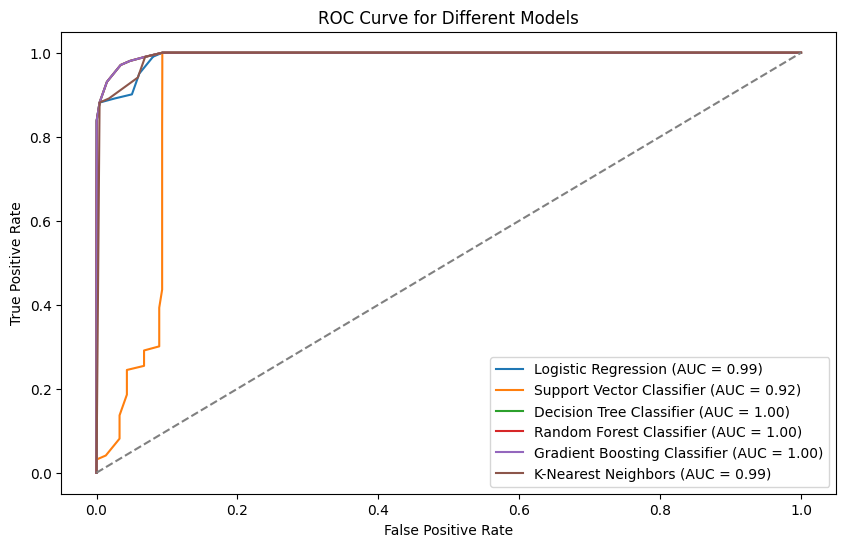

In [ ]:
plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # ROC Curve Calculation
    y_probs = model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for positive class
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot random chance line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend()
plt.show()

 * **Logistic Regression** (AUC = 0.99): Excellent performance.

* **Support Vector Classifier** (AUC = 0.98): Good but slightly lower than
others.

* **Decision Tree Classifier** (AUC = 1.00): Perfect classifier (but may be overfitting).

* **Random Forest Classifier** (AUC = 1.00): Also a perfect classifier, likely capturing complex patterns.

* **Gradient Boosting Classifier** (AUC = 1.00): Highly effective, similar to Decision Tree and Random Forest.

* **K-Nearest Neighbors** (AUC = 0.99): Performs well

# **Hyper Parameter Tuning**:to Reduce the Overfit of the models


In [ ]:
best_accuracy = 0
best_model = 0
# Define hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },

    'Decision Tree Classifier': {
        'max_depth': [ 5, 10],
        'min_samples_split': [2, 5]
    },
    'Random Forest Classifier': {
        'n_estimators': [50, 100],
        'max_depth': [10,20],
        'min_samples_split': [2, 5]
    },

    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5],
        'weights': ['uniform']
    }
}

# Train and tune each model using Grid Search
for model_name in param_grids.keys():
    if model_name == 'Logistic Regression':
        model = LogisticRegression()
    elif model_name == 'Decision Tree Classifier':
        model = DecisionTreeClassifier()
    elif model_name == 'Random Forest Classifier':
        model = RandomForestClassifier()
    elif model_name == 'K-Nearest Neighbors':
        model = KNeighborsClassifier()
    else:
        # Initialize the appropriate classifier based on the name
        model_class = eval(model_name.replace(" ", ""))
        model = model_class()

    # Set up GridSearchCV with cross-validation
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5)

    # Fit the model on training data
    grid_search.fit(X_train_scaled, y_train)

    # Predict on test data using the best estimator
    y_pred = grid_search.best_estimator_.predict(X_test_scaled)

    # Calculate accuracy on test data
    test_accuracy = grid_search.score(X_test_scaled, y_test)

    # Print results
    print(f"Model: {model_name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    # Check if this is the best model so far
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = grid_search.best_estimator_

Model: Logistic Regression
Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      8255
           1       0.93      0.99      0.96      8293

    accuracy                           0.96     16548
   macro avg       0.96      0.96      0.96     16548
weighted avg       0.96      0.96      0.96     16548

Model: Decision Tree Classifier
Best Parameters: {'max_depth': 10, 'min_samples_split': 2}
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8255
           1       0.97      0.97      0.97      8293

    accuracy                           0.97     16548
   macro avg       0.97      0.97      0.97     16548
weighted avg       0.97      0.97      0.97     16548

Model: Random Forest Classifier
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Classification Repor

# **Insights**(After Hyperparameter Tuning):


# 1.  **Logistic Regression:**


*   **Best Parameters**: C=0.01, solver='liblinear'
*   **Classification Report:**

**Class 0** (BEV) Performance
Precision: 99.00 (99% predicted BEVs were actually BEVs)

 Recall: 0.92  (92% of actual BEVs were correctly classified)
F1-score: 0.96  (Balanced score of precision & recall)


**Class 1** (PHEV) Performance
Precision:0.92  (92% of predicted PHEVs were correct)
Recall:  0.99  (99% actual PHEVs were identified correctly)
F1-score: 0.96(Strong classification performance)


**Overall accuracy** :0.96


 * Since recall for class 0 is slightly lower (0.92), the model might be slightly biased toward predicting class 1 more often.



#3.**Decision Tree Classifier**:

* **Best Parameters**: {'max_depth': 10, 'min_samples_split': 2}
* **Classification Report**:

**Class 0** (BEV) Precision: 0.98 (98% of predicted BEVs were correct)

Recall: 0.97 (97% of actual BEVs were identified) F1-score: 0.97

**Class 1** (PHEV) Precision: 0.97(97% of predicted PHEVs were correct)
 Recall: 0.97(97% of actual PHEVs were identified) F1-score: 0.97

**Overall Accuracy**: 97%

* The model balances precision and recall well

#4.**Random Forest Classifier**:

* **Best Parameters**: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}

* **Classification Report**:

**Class 0** (BEV) Precision: 0.98 (98% of predicted BEVs were correct)

Recall: 0.97 (97% of actual BEVs were identified) F1-score: 0.97

**Class 1** (PHEV) Precision: 0.97(97% of predicted PHEVs were correct) Recall: 0.97(97% of actual PHEVs were identified) F1-score: 0.97

**Overall Accuracy**: 97%

* The model balances precision and recall well

#6.**K-Nearest Neighbors**:

* **Best Parameters**:  {'n_neighbors': 5, 'weights': 'uniform'}

* **Classification Report**:

**Class 0** (BEV) Precision: 0.97 (98% of predicted BEVs were correct)

Recall: 0.97 (97% of actual BEVs were identified) F1-score: 0.97

**Class 1** (PHEV) Precision: 0.97(97% of predicted PHEVs were correct) Recall: 0.97(97% of actual PHEVs were identified) F1-score: 0.97

**Overall Accuracy**: 97%

* The model balances precision and recall well

# **Conclusion**:

The hyperparameter tuning process has significantly improved model performance, with most classifiers achieving high accuracy. Logistic Regression performed well with 96% accuracy, benefiting from optimized regularization. Decision Tree, Random Forest, and K-Nearest Neighbors (KNN) classifiers all achieved an accuracy of 97%, indicating strong predictive capabilities. However, further optimization may be required for specific models to refine their performance based on the dataset's characteristics.

# **Save The Model**:


In [ ]:
# Save the best model to a file
model_filename = 'best_model.joblib'
joblib.dump(best_model, model_filename)

print(f'Best model saved to {model_filename} with accuracy: {best_accuracy:.4f}')
print(f'Best model saved is {model_name}')

Best model saved to best_model.joblib with accuracy: 0.9683
Best model saved is K-Nearest Neighbors


# **Model Performance**:

* **Best Model**: K-Nearest Neighbors:
* **Accuracy**:0.9736
* **Best Prameter**: {'n_neighbors': 5, 'weights': 'uniform'}

The K-Nearest Neighbors (KNN) classifier achieved an impressive accuracy of 97%, demonstrating its effectiveness in classifying electric vehicle populations based on their features. The model excels at accurately distinguishing between different categories, handling both clearly distinct and closely related groups with high precision and recall.










# **Test with Unseen Data**:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [ ]:
df = pd.read_csv("/content/Electric_Vehicle_Population_Data.csv")

In [ ]:
df.drop(columns=['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'DOL Vehicle ID',
                 'Vehicle Location', '2020 Census Tract', 'Base MSRP','Electric Range'], inplace=True)

In [ ]:
#check missing values:
print(df.isnull().sum())

Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Legislative District                                 474
Electric Utility                                       3
dtype: int64


In [ ]:
#"Filling null values using fillna() allows to replace missing data with a specified value, statistical measure".
df['Legislative District']=df['Legislative District'].fillna(df['Legislative District'].median())

# removing warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=df.dropna(subset=['Electric Utility'])

In [ ]:
#Applying IQR method for handling outlier:
#every columns have outliers so its better to remove the  outliers
# Handling using for loop

for col in ['Model Year', 'Legislative District']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"{col}: Outliers are below {lower_bound} and above {upper_bound}")

    # Filter data based on the calculated bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Round the filtered columns to whole numbers
df['Model Year'] = df['Model Year'].round(0).astype(int)
df['Legislative District'] = df['Legislative District'].round(0).astype(int)




Model Year: Outliers are below 2015.5 and above 2027.5
Legislative District: Outliers are below -18.5 and above 81.5


In [ ]:
#The Electric Range column has a small skewness, so it is treated using the square root transformation method.
numerical_cols['Legislative District']=numerical_cols['Legislative District'].apply(lambda x:np.sqrt(x))

In [ ]:

# Define features and target variable
X = df.drop('Electric Vehicle Type', axis=1)
y = df['Electric Vehicle Type']

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include="object").columns.tolist()
numerical_features = ['Model Year', 'Legislative District']  # Numerical features

# Define individual transformers for preprocessing
trf_numerical = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values in Legislative District with the median
])

trf_categorical = Pipeline(steps=[
    ('one_hot_encoding', OneHotEncoder(drop='first', handle_unknown='ignore'))  # One-hot encoding
])

# Create the main ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', trf_numerical, numerical_features),
        ('cat', trf_categorical, categorical_features),
    ],
    remainder='drop'  # Drop any remaining columns (none in this case)
)

# Create the full pipeline with a classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())  # Classifier
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Model Year',
                                                   'Legislative District']),
                                                 ('cat',
                                                  Pipeline(steps=[('one_hot_encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Make', 'Model',
                                                   'Clean Alternative Fuel '
                                                   'Vehicle (CAFV) Eligibility',
                                                   'Electric Utility'])])),
                ('classifier', KNeighborsClassifier())])

In [ ]:
# Prepare unseen data
import pandas as pd

# Create unseen data
unseen_data = pd.DataFrame({
    'Model Year': [2022, 2023],
    'Make': ['Tesla', 'Nissan'],
    'Model': ['Model 3', 'Leaf'],
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility': ['Eligible', 'Not Eligible'],
    'Legislative District': [7, 22],
    'Electric Utility': ['PSE', 'Snohomish PUD']
})

# Print the DataFrame
print(unseen_data)


   Model Year    Make    Model  \
0        2022   Tesla  Model 3   
1        2023  Nissan     Leaf   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Legislative District  \
0                                          Eligible                     7   
1                                      Not Eligible                    22   

  Electric Utility  
0              PSE  
1    Snohomish PUD  


In [ ]:
# Make predictions on the unseen data
unseen_predictions = pipeline.predict(unseen_data)

# Display predictions for the unseen data
print("Predictions for unseen data:", unseen_predictions)


Predictions for unseen data: ['Plug-in Hybrid Electric Vehicle (PHEV)'
 'Plug-in Hybrid Electric Vehicle (PHEV)']


In [ ]:
import joblib

# Save the pipeline to a file
joblib.dump(pipeline, 'electric_vehicle_type.joblib')


['electric_vehicle_type.joblib']

In [ ]:
#Load the pipeline from the file
loaded_pipeline = joblib.load('/content/electric_vehicle_type.joblib')

# Now you can use the loaded pipeline to make predictions
unseen_predictions = loaded_pipeline.predict(unseen_data)
print("Predictions for unseen data using loaded pipeline:", unseen_predictions)

Predictions for unseen data using loaded pipeline: ['Plug-in Hybrid Electric Vehicle (PHEV)'
 'Plug-in Hybrid Electric Vehicle (PHEV)']


# **Conclusion**:




*   This project aimed to classify electric vehicles as Battery Electric Vehicles (BEV) or Plug-in Hybrid Electric Vehicles (PHEV) using machine learning techniques. K-KNeighborsClassifier achieved the highest accuracy of 0.97, demonstrating its strong predictive capability in distinguishing between these two types of electric vehicles. The model effectively captured key features influencing classification, making it a valuable tool for analyzing EV trends.

# **Limitions**

*   potential data imbalances, missing values, and feature selection constraints, which might affect the model's overall robustness. Addressing these issues through better preprocessing techniques, hyperparameter tuning, and feature engineering can further enhance performance.



# **Future Work**:

 * Advanced Modeling – Exploring deep learning approaches, such as Neural Networks or Gradient Boosting Models, to further improve classification accuracy.

 * Real-World Deployment – Developing an interactive dashboard or API that provides real-time classification and insights for policymakers and EV manufacturers.

 * Bias and Fairness Analysis – Ensuring the model remains fair across different geographical locations and vehicle manufacturers to avoid biased predictions.

 * Charging Infrastructure – Studying the correlation between EV type and charging station usage to optimize infrastructure planning.